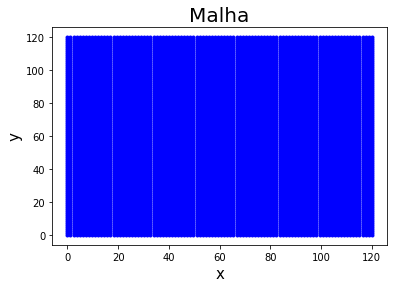

Temperatura no lado esquerdo: 75.
Temperatura no lado direito: 50.
Temperatura no lado superior: 100.
Temperatura no lado inferior: 0.
Iterações:  1411
Pontos iterados:  13551244


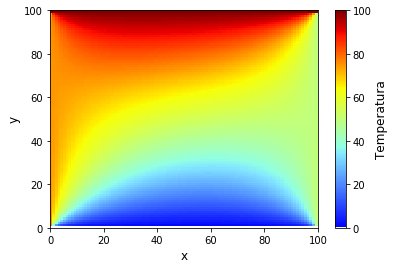

Tempo de Iteração (clock):  48.833 segundos
Limite superior do erro:  0.0001


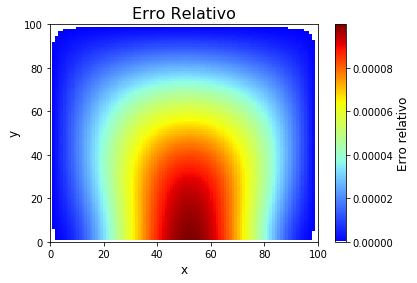

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import matplotlib
import time


# Passo
p = 100

# Limitante para o erro
Lim = 1.0e-4

# Limites da malha em x
Xneg = 0
Xpos = 20 + p

# Limites da malha em y
Yneg = 0
Ypos = 20 + p


#################   MALHA   #################


#Y = np.arange(Yneg, Ypos, p)
Y = np.linspace(Yneg, Ypos, p)
#X = np.arange(Xneg, Xpos, p)
X = np.linspace(Xneg, Xpos, p)  


# Plot da malha
xx, yy = np.meshgrid(X, Y, sparse=False)

plt.plot(xx, yy, 'b.')
plt.title('Malha', fontsize=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.show()


#################   CONDIÇÕES DE CONTORNO   #################

T = np.zeros([len(X),len(Y)])
T.transpose()


Tinf =  float(input("Temperatura no lado esquerdo: "))
Tsup =  float(input("Temperatura no lado direito: "))
Tdir =  float(input("Temperatura no lado superior: "))
Tesq =  float(input("Temperatura no lado inferior: "))

T[0,  :] = Tinf
T[-1, :] = Tsup
T[:, -1] = Tdir
T[:,  0] = Tesq

#print("T antes")
#print(T)


#################   SOLUÇÃO   #################



lamb = 1.5

# Auxiliares para o cálculo do erro relativo
erro = np.zeros([len(X),len(Y)]) + 10
erro[0,  :] = 0
erro[-1, :] = 0
erro[:, -1] = 0
erro[:,  0] = 0
Taux = np.zeros([len(X),len(Y)])
iterac = 0
loops = 0

t1 = time.clock()
t11 = time.time()

while np.any(erro > Lim):
    for i in range(1,len(X)-1):
        for j in range(1,len(Y)-1):
            Tnovo = (T[i-1,j]+T[i+1,j]+T[i,j-1]+T[i,j+1])/4
            T[i,j]=lamb*Tnovo+(1-lamb)*T[i,j]
            
            erro[i,j] = (T[i,j] - Taux[i,j])/T[i,j] # Cálculo do erro relativo em cada posição
            Taux[i,j] = T[i,j]
            loops += 1
    iterac += 1

print ('Iterações: ',iterac)
print ('Pontos iterados: ',loops)


t2 = time.clock()
t22 = time.time()


#print (erro)

#print("T depois")
#print(np.round(T,2))


####################   PLOTS   #######################

# tabela de cores para o plot
dic = {'red': ((0., 1, 1), 
               (0.00000000001, 0, 0), 
               (0.66, 1, 1), 
               (0.89,1, 1), 
               (1, 0.5, 0.5)), 
       'green': ((0., 1, 1), 
                (0.00000000001, 0, 0), 
                (0.375,1, 1), 
                (0.64,1, 1), 
                (0.91,0,0), 
                (1, 0, 0)), 
       'blue': ((0., 1, 1), 
               (0.00000000001, 1, 1), 
               (0.34, 1, 1), 
               (0.65,0, 0), 
               (1, 0, 0))}

my_cmap = matplotlib.colors.LinearSegmentedColormap('my_colormap',dic,256)



# plot
fig, ax = plt.subplots() # Cria a figura com um subplot
pcolor(T.T, cmap=my_cmap)#cmap='RdBu_r') #my_cmap muda para as cores personalizadas 
cbar = colorbar()


cbar.ax.set_ylabel('Temperatura', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)


#fig.savefig('0.0001.pdf', bbox_inches='tight') # Salva a figura
show()


print("Tempo de Iteração (clock): ", np.round(t2-t1,3), "segundos")
print("Limite superior do erro: ", Lim)
#print("Tempo de Iteração (time): ",t22-t11)


fig2, ax2 = plt.subplots() # Cria a figura com um subplot
pcolor(erro.T, cmap=my_cmap)#cmap='RdBu_r') #my_cmap muda para as cores personalizadas 
cbar = colorbar()

ax2.set_title('Erro Relativo', fontsize=16)
cbar.ax.set_ylabel('Erro relativo', fontsize=12)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('y', fontsize=12)
show()